In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [40]:
df = pd.read_csv("/Users/ros/Desktop/CDSS/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [42]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [43]:
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})

In [44]:
df['internet'] = df['internet'].replace(['yes'],'1')
df['internet'] = df['internet'].replace(['no'],'0')

In [45]:
df_Cont = df[['studytime', 'internet']]
df_Cont.head(3)

,studytime,internet
0,2,0
1,2,1
2,2,1


In [46]:
df.internet.unique()

array([0, 1])

In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit_transform(df_Cont)

In [48]:
from sklearn.cluster import KMeans

WCSS = [] # inter cluster distance
    
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_)
    
wcss

/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/ros/an

[790.0,
 393.60527795100586,
 161.16729267328157,
 81.37599300109363,
 44.84057198672261,
 21.28497255955313,
 3.4161694674037992,
 1.6105926197678528e-28,
 1.2457444511031348e-28,
 1.2457444511031348e-28,
 1.406967898607679e-28,
 1.4015136650051744e-28,
 1.4015136650051744e-28,
 1.4015136650051744e-28]

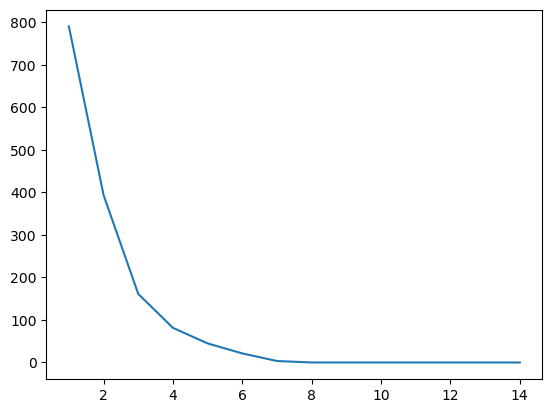

In [49]:
plt.plot(range(1,15),wcss)

In [50]:
diff_wcss = []

for i in range(0,10):
    diff_wcss.append(wcss[i]-wcss[i+1])
    
diff_wcss

[396.39472204899414,
 232.4379852777243,
 79.79129967218793,
 36.535421014371025,
 23.55559942716948,
 17.868803092149328,
 3.4161694674037992,
 3.6484816866471796e-29,
 0.0,
 -1.612234475045443e-29]

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,9):
    KM = KMeans(n_clusters = i,random_state = 1)
    KM.fit(ss)
    labels = KM.labels_
    print(silhouette_score(ss,labels, random_state = 1))

/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6583719438664971
0.7204002785373309
0.8782242442671636


/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.8909380348977979
0.9544385461690742
0.9898734177215189
1.0


/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
mod2 = KMeans(n_clusters = 7)
mod2 = mod2.fit(ss)

df_Cont['Clusters'] = mod2.labels_

df_Cont.head()

/Users/ros/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/ty/87rxfdg13g53g18wx7gj_hgw0000gn/T/ipykernel_1027/2664022553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cont['Clusters'] = mod2.labels_


,studytime,internet,Clusters
0,2,0,2
1,2,1,1
2,2,1,1
3,3,1,3
4,2,0,2


In [53]:
centroids = mod2.cluster_centers_
centroids

array([[-1.23535078,  0.44789274],
       [-0.04228585,  0.44789274],
       [-0.04228585, -2.23267743],
       [ 1.15077909,  0.44789274],
       [ 2.34384403,  0.44789274],
       [ 1.62800507, -2.23267743],
       [-1.23535078, -2.23267743]])

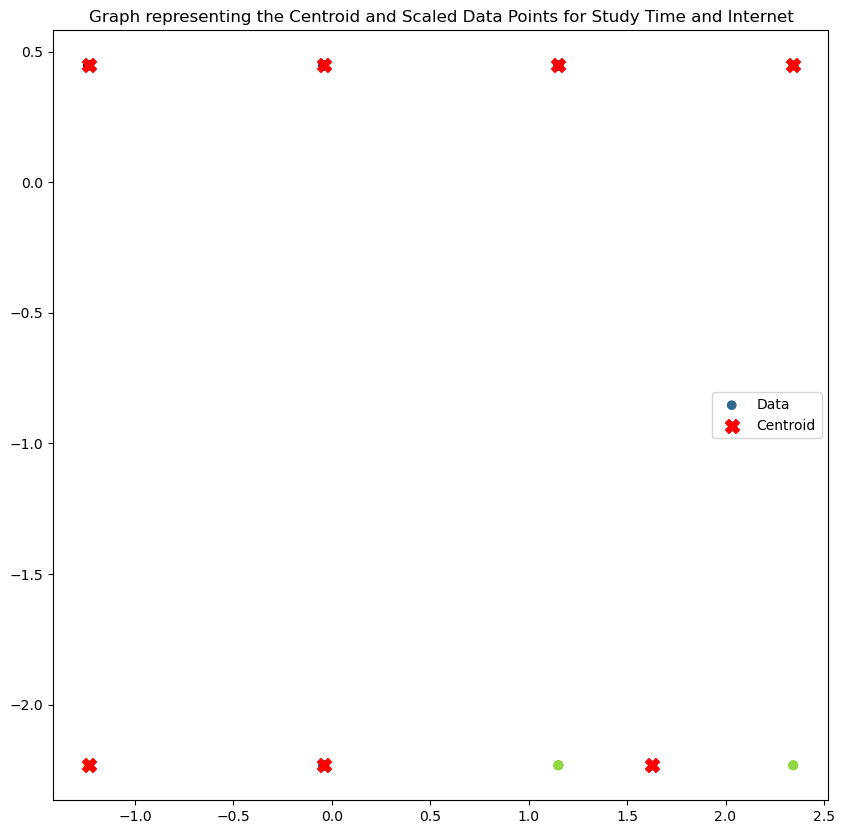

In [54]:
plt.figure(figsize = (10,10))

plt.scatter (ss[:, 0], ss[:, 1], c =  df_Cont['Clusters'], cmap = 'viridis')

plt.scatter(centroids[:,0], centroids [:,1], marker = 'X', s = 100, c = 'red', label = 'Centroids')

plt.legend(['Data', 'Centroid'])
plt.title('Graph representing the Centroid and Scaled Data Points for Study Time and Internet')
plt.show()

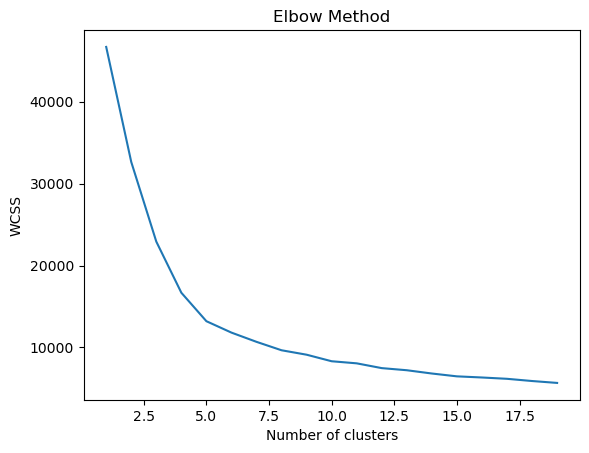

In [64]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_performance)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 20), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
df_performance = df.iloc[:, [6,7,12,13,14,24,25,28,29,30,31,32]]
df_performance.head(4)

,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
0,4,4,2,2,0,3,4,3,6,5,6,6
1,1,1,1,2,0,3,3,3,4,5,5,6
2,1,1,1,2,3,3,2,3,10,7,8,10
3,4,2,1,3,0,2,2,5,2,15,14,15


In [95]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_performance)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [df_performance[df['Cluster'] == i] for i in range(11)]

In [96]:
cluster_dataframes

[     Medu  Fedu  traveltime  studytime  failures  freetime  goout  health  \
 3       4     2           1          3         0         2      2       5   
 5       4     3           1          2         0         4      2       5   
 6       2     2           1          2         0         4      4       3   
 8       3     2           1          2         0         2      2       1   
 9       3     4           1          2         0         5      1       5   
 ..    ...   ...         ...        ...       ...       ...    ...     ...   
 378     3     3           1          2         0         1      3       1   
 380     4     4           1          2         0         2      4       2   
 382     2     3           2          2         0         4      3       3   
 391     3     1           2          1         0         4      5       2   
 393     3     2           3          1         0         4      1       5   
 
      absences  G1  G2  G3  
 3           2  15  14  15  
 5  

In [97]:
df_performance.info()
df_performance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Medu        395 non-null    int64
 1   Fedu        395 non-null    int64
 2   traveltime  395 non-null    int64
 3   studytime   395 non-null    int64
 4   failures    395 non-null    int64
 5   freetime    395 non-null    int64
 6   goout       395 non-null    int64
 7   health      395 non-null    int64
 8   absences    395 non-null    int64
 9   G1          395 non-null    int64
 10  G2          395 non-null    int64
 11  G3          395 non-null    int64
dtypes: int64(12)
memory usage: 37.2 KB


,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


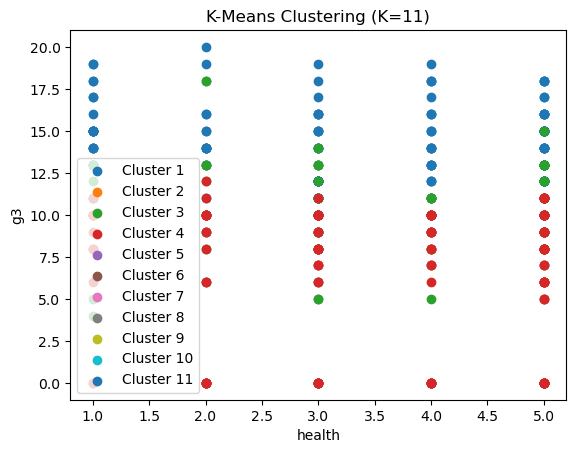

In [101]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['health'], cluster_df['G3'], label=f'Cluster {i + 1}')

plt.xlabel('health')
plt.ylabel('g3')
plt.title('K-Means Clustering (K=11)')
plt.legend()
plt.show()

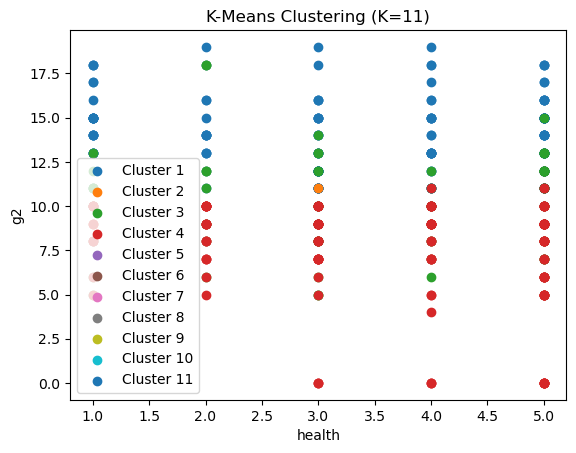

In [99]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['health'], cluster_df['G2'], label=f'Cluster {i + 1}')

plt.xlabel('health')
plt.ylabel('g2')
plt.title('K-Means Clustering (K=11)')
plt.legend()
plt.show()

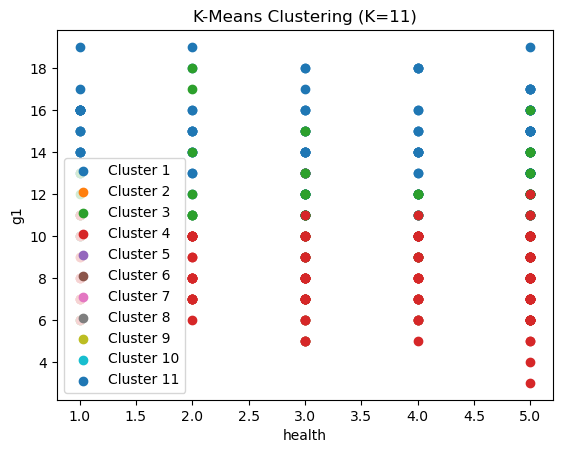

In [100]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['health'], cluster_df['G1'], label=f'Cluster {i + 1}')

plt.xlabel('health')
plt.ylabel('g1')
plt.title('K-Means Clustering (K=11)')
plt.legend()
plt.show()

# Exploratory Data Analysis

In [102]:
iris = pd.read_csv("diabetes.csv")